In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# read data
raw = pd.read_csv('vgsales.csv')

In [3]:
# basic view
print(raw.info())
print('-----------------------------------------------')
print(raw.describe())
print('===============================================')
print(raw.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
Rank            16598 non-null int64
Name            16598 non-null object
Platform        16598 non-null object
Year            16327 non-null float64
Genre           16598 non-null object
Publisher       16540 non-null object
NA_Sales        16598 non-null float64
EU_Sales        16598 non-null float64
JP_Sales        16598 non-null float64
Other_Sales     16598 non-null float64
Global_Sales    16598 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.1+ MB
None
-----------------------------------------------
               Rank          Year      NA_Sales      EU_Sales      JP_Sales  \
count  16598.000000  16327.000000  16598.000000  16598.000000  16598.000000   
mean    8300.605254   2006.406443      0.264667      0.146652      0.077782   
std     4791.853933      5.828981      0.816683      0.505351      0.309291   
min        1.000000   1980.000000    

C:\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


In [4]:
# Clean data
proc_raw = raw[raw.Year.notnull()]
proc_raw = proc_raw[proc_raw.Year<=2016]
proc_raw = proc_raw[proc_raw.Publisher.notnull()]
proc_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16287 entries, 0 to 16597
Data columns (total 11 columns):
Rank            16287 non-null int64
Name            16287 non-null object
Platform        16287 non-null object
Year            16287 non-null float64
Genre           16287 non-null object
Publisher       16287 non-null object
NA_Sales        16287 non-null float64
EU_Sales        16287 non-null float64
JP_Sales        16287 non-null float64
Other_Sales     16287 non-null float64
Global_Sales    16287 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.2+ MB


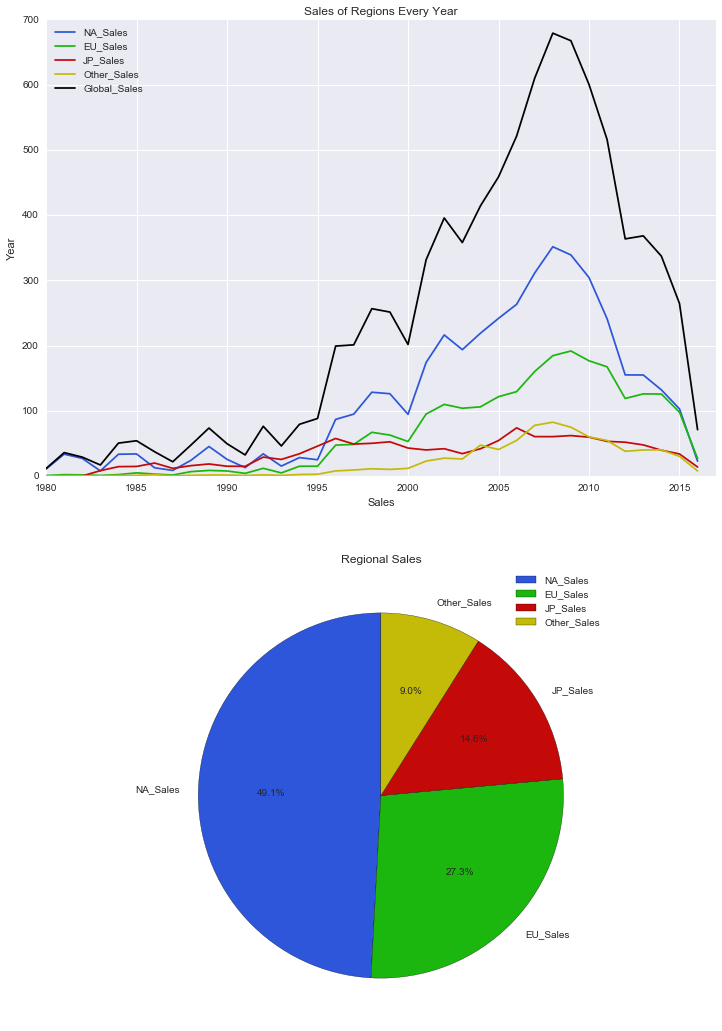

In [28]:
# Regional Markets
sales_region = proc_raw[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum(axis=0)
sales_year = proc_raw.groupby('Year')['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales'].sum()
Year = [int(x) for x in sales_year.index.values.tolist()]
fig = plt.figure(figsize=(12,18))
colors = ['#2e56db','#1cb70e','#c40909','#c4bb09','#000000']
ax1 = fig.add_subplot(211)
for col,c in zip(sales_year, colors):
    ax1.plot(Year,sales_year[col],color=c, label=col)
ax1.set_xlim(1980,2017)
ax1.set_xlabel('Sales')
ax1.set_ylabel('Year')
ax1.set_title('Sales of Regions Every Year')
ax1.legend(loc='upper left',fontsize='medium')
labels = sales_region.index.values.tolist()
total = sales_region.values.sum()
sizes = [x*100/total for x in sales_region.values.tolist()]
colors_r = colors[:4]
ax2 = fig.add_subplot(212,aspect='equal')
ax2.pie(sizes,labels=labels,colors=colors_r,
                                labeldistance = 1.1,autopct = '%3.1f%%',shadow = False,
                                startangle = 90,pctdistance = 0.6)
ax2.set_title('Regional Sales')
ax2.legend()
plt.show()


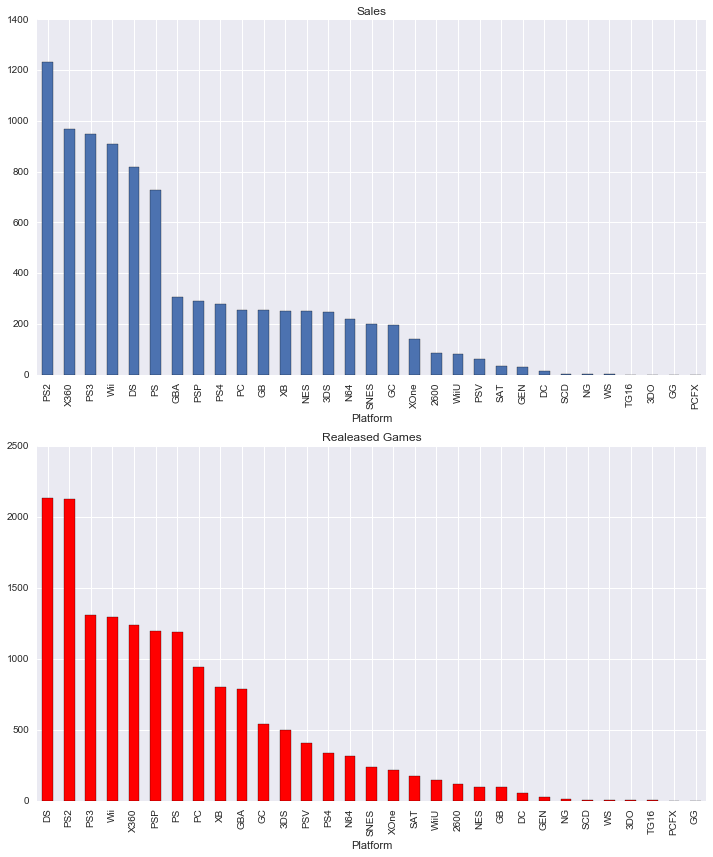

In [124]:
# Platforms
sales_plat = proc_raw.groupby('Platform')['Global_Sales'].sum()
counts_plat = proc_raw.groupby('Platform')['Name'].count()
sales_plat = sales_plat.sort_values(ascending=False)
counts_plat = counts_plat.sort_values(ascending=False)
f, (ax1,ax2) = plt.subplots(2,1,figsize=(12,14))
sales_plat.plot.bar(ax=ax1,title='Sales')
counts_plat.plot.bar(ax=ax2,color='r',title='Realeased Games')

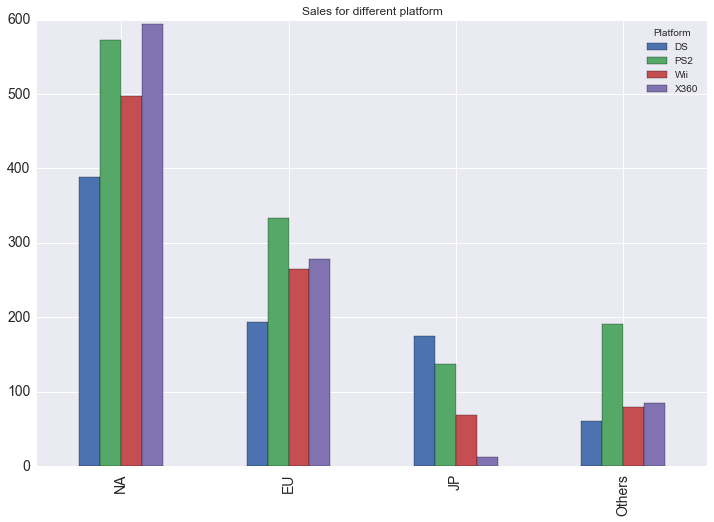

In [34]:
# DS, PS2, Wii and X360 sales in diefferent markets
TF_sales = proc_raw[proc_raw.Platform.isin(['DS','PS2','Wii','X360'])]
TF_sales_mk = TF_sales.groupby('Platform')['NA_Sales','EU_Sales','JP_Sales','Other_Sales'].sum()
TF_sales_mk = TF_sales_mk.transpose()
TF_sales_mk.index = ['NA','EU','JP','Others']
TF_sales_mk.plot.bar(figsize=(12,8), title='Sales for different platform', fontsize=14)
plt.show()

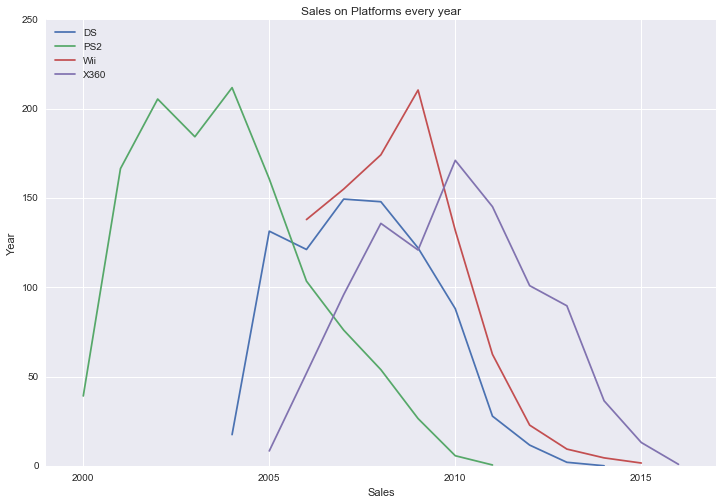

In [40]:
# DS, PS2, Wii and X360 sales for years
TF_sales_y = pd.pivot_table(TF_sales, values='Global_Sales', index='Year', columns='Platform', aggfunc=np.sum)
Year = [int(x) for x in TF_sales_y.index.values.tolist()]
fig = plt.figure(figsize=(12,8))
colors = ['#4B72B2','#56A869','#C34F51','#8173B0']
for col,c in zip(TF_sales_y, colors):
    plt.plot(Year,TF_sales_y[col],color=c, label=col)
plt.xlabel('Sales')
plt.ylabel('Year')
plt.xlim(1999,2017)
plt.title('Sales on Platforms every year')
plt.legend(loc='upper left',fontsize='medium')
plt.show()

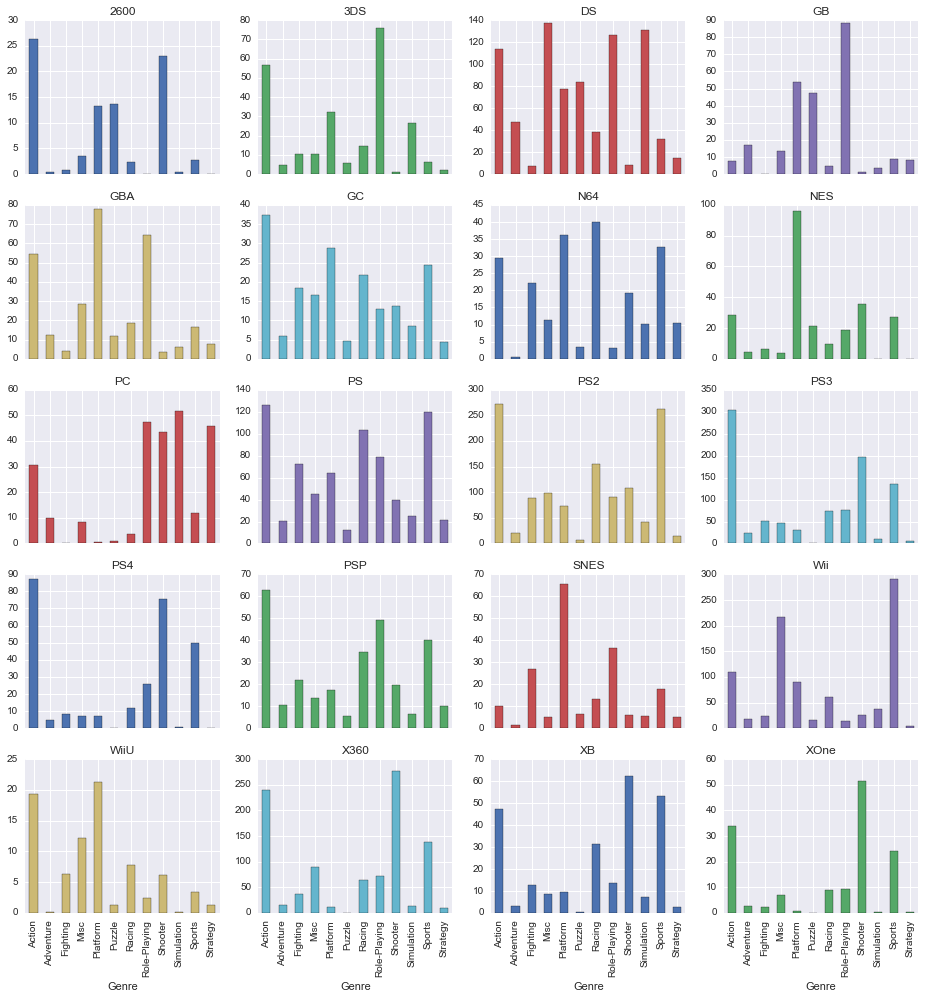

In [74]:
# Sales for Genre and platform
columns = sales_plat[sales_plat>80].index.values.tolist()
sales_genre = proc_raw[proc_raw.Platform.isin(columns)]
sales_genre_pf = pd.pivot_table(sales_genre, values='Global_Sales', index='Genre', columns='Platform', aggfunc=np.sum)
sales_genre_pf.plot(kind='bar', subplots=True, layout=(5,4), figsize=(16,16), legend=False)
plt.show()

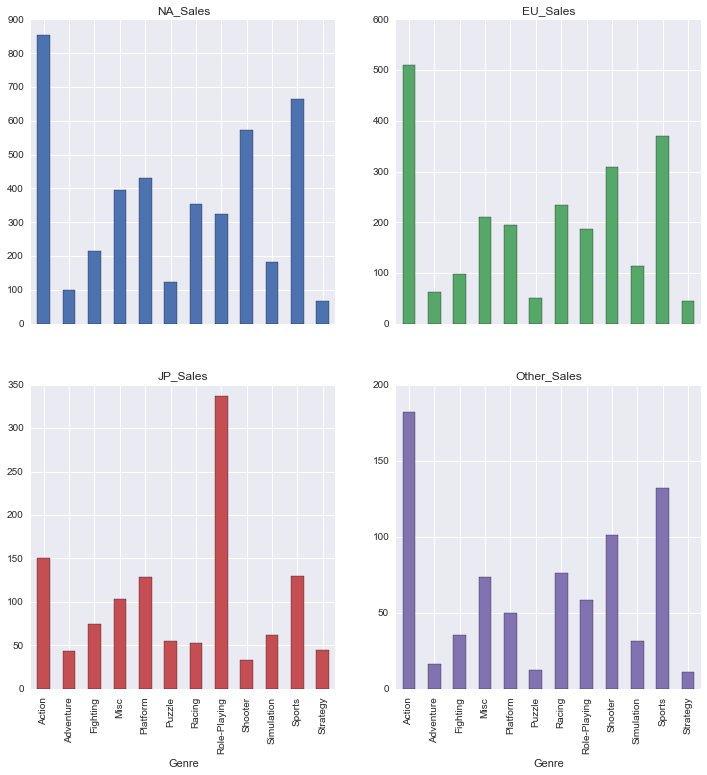

In [77]:
# Sales for Genres and Markets
sales_genre_mk = sales_genre.groupby('Genre')['NA_Sales','EU_Sales','JP_Sales','Other_Sales'].sum()
sales_genre_mk.plot(kind='bar', subplots=True, layout=(2,2), figsize=(12,12), legend=False)
plt.show()

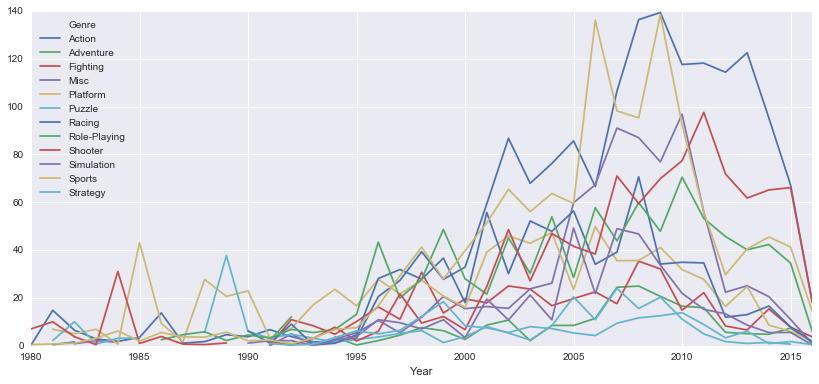

In [93]:
# Sales for Genres and Years
sales_genre_y = pd.pivot_table(sales_genre, values='Global_Sales', index='Year', columns='Genre', aggfunc=np.sum)
sales_genre_y.plot(figsize=(14,6))
plt.show()